In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/33782/Desktop/Mémoire F1/df_final_2.csv")

In [ ]:
df.info()

In [3]:
from sklearn.preprocessing import OneHotEncoder

# Supposons que vous avez déjà importé votre DataFrame df_final

# Sélectionnez les colonnes à encoder
columns_to_encode = ["nationality"]

# Créez une instance de OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Adapter et transformer les colonnes sélectionnées
encoded_data = encoder.fit_transform(df[columns_to_encode])

# Créez un DataFrame avec les données encodées
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Supprimez les colonnes encodées du DataFrame d'origine
df.drop(columns=columns_to_encode, inplace=True)

# Concaténez le DataFrame original avec le DataFrame encodé
df_final = pd.concat([df, encoded_df], axis=1)

In [4]:
df_final.drop(columns="positionOrder", inplace=True)

In [ ]:
df_final.info()

In [5]:
# Create a list of columns excluding the one to move
cols = [col for col in df_final.columns if col != 'Top 3 Finish']

# Append the column to the end of the DataFrame
df_final = df_final[cols + ['Top 3 Finish']]

In [6]:
train_df = df_final[(df_final["year"] >= 2012) & (df_final["year"] <= 2022)]
test_df = df_final[(df_final["year"] == 2023)]


X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values


X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values

In [7]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score
from imblearn.over_sampling import SMOTE

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Créer un modèle SVM
svm_model = SVC(random_state=42)

param_grid = {
    'C': [8,9,10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}



# Créer l'objet GridSearchCV
svm_grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring="recall", verbose=1, n_jobs=-1)

# Exécuter la recherche d'hyperparamètres sur l'ensemble d'entraînement
svm_grid_search.fit(X_train_scaled, y_train_resampled)

# Afficher les meilleurs paramètres et le meilleur score
print("Best Parameters:", svm_grid_search.best_params_)
print("Best Score:", svm_grid_search.best_score_)

# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_svm_model = svm_grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Afficher les performances
print("\nAccuracy:", accuracy_svm)
print("\nConfusion Matrix:\n", conf_matrix_svm)
print("\nClassification Report:\n", class_report_svm)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score
from imblearn.over_sampling import SMOTE
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    C = trial.suggest_categorical('C', [12.24251805])
    kernel = trial.suggest_categorical('kernel', ['linear'])
    gamma = trial.suggest_categorical('gamma', ['auto'])

    # Créer un modèle SVM avec les hyperparamètres suggérés
    svm_model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)

    # Entraîner le modèle
    svm_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_svm = svm_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_svm)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle SVM final
best_svm_model = SVC(**best_params, random_state=42)
best_svm_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Afficher les performances
print("\nAccuracy:", accuracy_svm)
print("\nConfusion Matrix:\n", conf_matrix_svm)
print("\nClassification Report:\n", class_report_svm)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score
from imblearn.over_sampling import SMOTE
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    C = trial.suggest_float('C', 10, 20, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear'])
    gamma = trial.suggest_categorical('gamma', ['auto'])

    # Créer un modèle SVM avec les hyperparamètres suggérés
    svm_model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)

    # Entraîner le modèle
    svm_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_svm = svm_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_svm)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle SVM final
best_svm_model = SVC(**best_params, random_state=42)
best_svm_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Afficher les performances
print("\nAccuracy:", accuracy_svm)
print("\nConfusion Matrix:\n", conf_matrix_svm)
print("\nClassification Report:\n", class_report_svm)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Créer un modèle Gradient Boosting avec les hyperparamètres suggérés
    gb_model = GradientBoostingClassifier(learning_rate=learning_rate,
                                           n_estimators=n_estimators,
                                           max_depth=max_depth,
                                           min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf,
                                           random_state=42)

    # Entraîner le modèle
    gb_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_gb = gb_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_gb)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle Gradient Boosting final
best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Afficher les performances
print("\nAccuracy:", accuracy_gb)
print("\nConfusion Matrix:\n", conf_matrix_gb)
print("\nClassification Report:\n", class_report_gb)


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Créer un modèle Gradient Boosting avec les hyperparamètres suggérés
    gb_model = GradientBoostingClassifier(learning_rate=learning_rate,
                                           n_estimators=n_estimators,
                                           max_depth=max_depth,
                                           min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf,
                                           random_state=42)

    # Utiliser la validation croisée stratifiée
    skf = StratifiedKFold(n_splits=5)
    f1_scores = cross_val_score(gb_model, X_train_scaled, y_train_resampled, cv=skf, scoring='f1')

    # Calculer la moyenne des scores F1
    mean_f1_score = np.mean(f1_scores)

    return mean_f1_score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle Gradient Boosting final
best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Afficher les performances
print("\nAccuracy:", accuracy_gb)
print("\nConfusion Matrix:\n", conf_matrix_gb)
print("\nClassification Report:\n", class_report_gb)


[I 2024-05-24 09:39:19,447] A new study created in memory with name: no-name-f9944fdd-2fe9-495b-9046-5f2383d13b28
[I 2024-05-24 09:39:50,140] Trial 0 finished with value: 0.7797038800592305 and parameters: {'learning_rate': 0.04911196424566634, 'n_estimators': 122, 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.7797038800592305.
[I 2024-05-24 09:40:15,068] Trial 1 finished with value: 0.7943208939350216 and parameters: {'learning_rate': 0.04720323045901661, 'n_estimators': 70, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.7943208939350216.
[I 2024-05-24 09:40:42,424] Trial 2 finished with value: 0.7879823093920845 and parameters: {'learning_rate': 0.04808830471294363, 'n_estimators': 106, 'max_depth': 4, 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.7943208939350216.
[I 2024-05-24 09:41:52,343] Trial 3 finished with value: 0.7984602577050023 and parameters: {

Best Parameters: {'learning_rate': 0.028075089163461433, 'n_estimators': 71, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 2}
Best Score: 0.8005857960214481

Accuracy: 0.8636363636363636

Confusion Matrix:
 [[333  41]
 [ 19  47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       374
           1       0.53      0.71      0.61        66

    accuracy                           0.86       440
   macro avg       0.74      0.80      0.76       440
weighted avg       0.88      0.86      0.87       440



In [10]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(best_gb_model,
                                                             X_train_scaled,
                                                             y_train_resampled,
                                                             train_sizes=[i/10 for i in range(1,11)])



NameError: name 'plt' is not defined

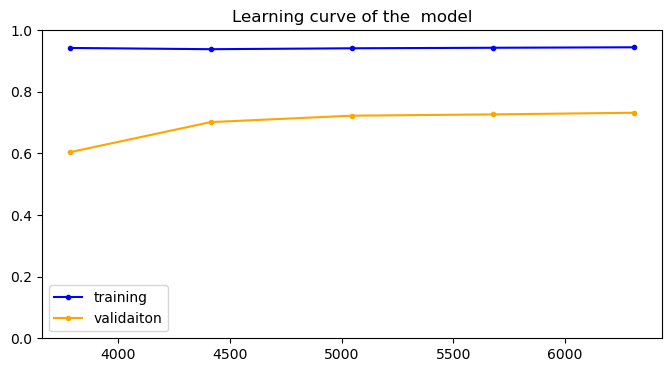

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(train_sizes, train_scores.mean(axis=1), label='training',marker='.', color='blue')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='validaiton',marker='.', color='orange')
plt.title(f"Learning curve of the  model")
plt.legend(loc='best')
plt.ylim(0,1)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 8)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Créer un modèle Gradient Boosting avec les hyperparamètres suggérés
    gb_model = GradientBoostingClassifier(learning_rate=learning_rate,
                                           n_estimators=n_estimators,
                                           max_depth=max_depth,
                                           min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf,
                                           random_state=42)

    # Entraîner le modèle
    gb_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_gb = gb_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_gb)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle Gradient Boosting final
best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Afficher les performances
print("\nAccuracy:", accuracy_gb)
print("\nConfusion Matrix:\n", conf_matrix_gb)
print("\nClassification Report:\n", class_report_gb)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    learning_rate = trial.suggest_float('learning_rate', 0.001, 1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 12)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Créer un modèle Gradient Boosting avec les hyperparamètres suggérés
    gb_model = GradientBoostingClassifier(learning_rate=learning_rate,
                                           n_estimators=n_estimators,
                                           max_depth=max_depth,
                                           min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf,
                                           random_state=42)

    # Entraîner le modèle
    gb_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_gb = gb_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_gb)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=75)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle Gradient Boosting final
best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Afficher les performances
print("\nAccuracy:", accuracy_gb)
print("\nConfusion Matrix:\n", conf_matrix_gb)
print("\nClassification Report:\n", class_report_gb)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    learning_rate = trial.suggest_categorical('learning_rate', [0.0019772333924089505])
    n_estimators = trial.suggest_int('n_estimators', 191, 191)
    max_depth = trial.suggest_int('max_depth', 9, 9)
    min_samples_split = trial.suggest_int('min_samples_split', 8, 8)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 5)
    
    # Créer un modèle Gradient Boosting avec les hyperparamètres suggérés
    gb_model = GradientBoostingClassifier(learning_rate=learning_rate,
                                           n_estimators=n_estimators,
                                           max_depth=max_depth,
                                           min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf,
                                           random_state=42)

    # Entraîner le modèle
    gb_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_gb = gb_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_gb)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle Gradient Boosting final
best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Afficher les performances
print("\nAccuracy:", accuracy_gb)
print("\nConfusion Matrix:\n", conf_matrix_gb)
print("\nClassification Report:\n", class_report_gb)


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_gb_model,X_train_scaled, y_train_resampled, cv=5, scoring='f1')
print(np.mean(cv_scores))

In [ ]:
print(np.mean(cv_scores))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    learning_rate = trial.suggest_categorical('learning_rate', [0.0010794024887915957])
    n_estimators = trial.suggest_int('n_estimators', 194, 194)
    max_depth = trial.suggest_int('max_depth', 7, 7)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 5)
    
    # Créer un modèle Gradient Boosting avec les hyperparamètres suggérés
    gb_model = GradientBoostingClassifier(learning_rate=learning_rate,
                                           n_estimators=n_estimators,
                                           max_depth=max_depth,
                                           min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf,
                                           random_state=42)

    # Évaluer le modèle avec validation croisée
    scores = cross_val_score(gb_model,X_train_scaled, y_train_resampled, cv=5, scoring='f1')

    # Calculer le score moyen de la validation croisée
    score = np.mean(scores)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle Gradient Boosting final
best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Afficher les performances
print("\nAccuracy:", accuracy_gb)
print("\nConfusion Matrix:\n", conf_matrix_gb)
print("\nClassification Report:\n", class_report_gb)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Tracer les learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_gb_model, X_train_scaled, y_train_resampled, cv=10, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    
    # Créer un modèle Random Forest avec les hyperparamètres suggérés
    rf_model = RandomForestClassifier(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf,
                                       max_features=max_features,
                                       random_state=42)

    # Entraîner le modèle
    rf_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_rf = rf_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_rf)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle Random Forest final
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Afficher les performances
print("\nAccuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    
    # Créer un modèle DecisionTreeClassifier avec les hyperparamètres suggérés
    dt_model = DecisionTreeClassifier(max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      max_features=max_features,
                                      random_state=42)

    # Entraîner le modèle
    dt_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_dt = dt_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_dt)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle DecisionTreeClassifier final
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Afficher les performances
print("\nAccuracy:", accuracy_dt)
print("\nConfusion Matrix:\n", conf_matrix_dt)
print("\nClassification Report:\n", class_report_dt)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import optuna
from catboost import CatBoostClassifier

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    iterations = trial.suggest_int('iterations', 50, 500)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    depth = trial.suggest_int('depth', 4, 10)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10)
    
    # Créer un modèle CatBoost avec les hyperparamètres suggérés
    cb_model = CatBoostClassifier(iterations=iterations,
                                  learning_rate=learning_rate,
                                  depth=depth,
                                  l2_leaf_reg=l2_leaf_reg,
                                  verbose=0,
                                  random_state=42)

    # Entraîner le modèle
    cb_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_cb = cb_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_cb)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle CatBoost final
best_cb_model = CatBoostClassifier(**best_params, verbose=0, random_state=42)
best_cb_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_cb = best_cb_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_cb = accuracy_score(y_test, y_pred_cb)
conf_matrix_cb = confusion_matrix(y_test, y_pred_cb)
class_report_cb = classification_report(y_test, y_pred_cb)

# Afficher les performances
print("\nAccuracy:", accuracy_cb)
print("\nConfusion Matrix:\n", conf_matrix_cb)
print("\nClassification Report:\n", class_report_cb)


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_cb_model,X_train_scaled, y_train_resampled, cv=5, scoring='f1')
print(np.mean(cv_scores))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import optuna
from catboost import CatBoostClassifier

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    iterations = trial.suggest_int('iterations', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 1,log=True)
    depth = trial.suggest_int('depth', 3, 12)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10)
    
    # Créer un modèle CatBoost avec les hyperparamètres suggérés
    cb_model = CatBoostClassifier(iterations=iterations,
                                  learning_rate=learning_rate,
                                  depth=depth,
                                  l2_leaf_reg=l2_leaf_reg,
                                  verbose=0,
                                  random_state=42)

    # Entraîner le modèle
    cb_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_cb = cb_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_cb)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle CatBoost final
best_cb_model = CatBoostClassifier(**best_params, verbose=0, random_state=42)
best_cb_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_cb = best_cb_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_cb = accuracy_score(y_test, y_pred_cb)
conf_matrix_cb = confusion_matrix(y_test, y_pred_cb)
class_report_cb = classification_report(y_test, y_pred_cb)

# Afficher les performances
print("\nAccuracy:", accuracy_cb)
print("\nConfusion Matrix:\n", conf_matrix_cb)
print("\nClassification Report:\n", class_report_cb)


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_cb_model,X_train_scaled, y_train_resampled, cv=5, scoring='f1')
print(np.mean(cv_scores))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 1,log=True)
    
    # Créer un modèle AdaBoost avec les hyperparamètres suggérés
    ab_model = AdaBoostClassifier(n_estimators=n_estimators,
                                  learning_rate=learning_rate,
                                  random_state=42)

    # Entraîner le modèle
    ab_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_ab = ab_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_ab)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle AdaBoost final
best_ab_model = AdaBoostClassifier(**best_params, random_state=42)
best_ab_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_ab = best_ab_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_ab = accuracy_score(y_test, y_pred_ab)
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)
class_report_ab = classification_report(y_test, y_pred_ab)

# Afficher les performances
print("\nAccuracy:", accuracy_ab)
print("\nConfusion Matrix:\n", conf_matrix_ab)
print("\nClassification Report:\n", class_report_ab)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    n_estimators = trial.suggest_int('n_estimators', 160, 160)
    learning_rate = trial.suggest_float('learning_rate', 0.15826735517631804, 0.15826735517631804,log=True)
    algorithm = trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R'])
    # Vous pouvez ajouter d'autres hyperparamètres à optimiser ici, comme base_estimator, etc.

    # Créer un modèle AdaBoost avec les hyperparamètres suggérés
    ab_model = AdaBoostClassifier(n_estimators=n_estimators,
                                  learning_rate=learning_rate,
                                  algorithm=algorithm,
                                  random_state=42)

    # Entraîner le modèle
    ab_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_ab = ab_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_ab,zero_division=1)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle AdaBoost final
best_ab_model = AdaBoostClassifier(**best_params, random_state=42)
best_ab_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_ab = best_ab_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_ab = accuracy_score(y_test, y_pred_ab)
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)
class_report_ab = classification_report(y_test, y_pred_ab)

# Afficher les performances
print("\nAccuracy:", accuracy_ab)
print("\nConfusion Matrix:\n", conf_matrix_ab)
print("\nClassification Report:\n", class_report_ab)


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_ab_model,X_train_scaled, y_train_resampled, cv=5, scoring='f1')
print(np.mean(cv_scores))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import optuna

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Définir les classificateurs de base pour le stacking
base_classifiers = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('ab', AdaBoostClassifier(random_state=42)),
    ('knn', KNeighborsClassifier())
]

def objective(trial):
    # Définir les hyperparamètres à optimiser pour le classificateur de stacking
    meta_algorithm = trial.suggest_categorical('meta_algorithm', ['logistic', 'rf'])
    meta_max_depth = trial.suggest_int('meta_max_depth', 3, 10)
    
    # Créer un modèle de stacking avec les hyperparamètres suggérés
    stack_model = StackingClassifier(estimators=base_classifiers,
                                     final_estimator=AdaBoostClassifier(random_state=42),
                                     cv=5)

    # Entraîner le modèle
    stack_model.fit(X_train_scaled, y_train_resampled)

    # Faire des prédictions sur l'ensemble de test
    y_pred_stack = stack_model.predict(X_test_scaled)

    # Calculer le score F1
    score = f1_score(y_test, y_pred_stack)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle de stacking final
meta_algorithm = best_params['meta_algorithm']
meta_max_depth = best_params['meta_max_depth']
final_estimator = AdaBoostClassifier(random_state=42)

stack_model = StackingClassifier(estimators=base_classifiers,
                                 final_estimator=final_estimator,
                                 cv=5)
stack_model.fit(X_train_scaled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred_stack = stack_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy_stack = accuracy_score(y_test, y_pred_stack)
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
class_report_stack = classification_report(y_test, y_pred_stack)

# Afficher les performances
print("\nAccuracy:", accuracy_stack)
print("\nConfusion Matrix:\n", conf_matrix_stack)
print("\nClassification Report:\n", class_report_stack)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1, log=True)
    num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 5)
    num_neurons = trial.suggest_int('num_neurons', 10, 100)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)

    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))

    for _ in range(num_hidden_layers):
        model.add(Dense(num_neurons, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle
    model.fit(X_train_scaled, y_train_resampled, epochs=10, batch_size=32, verbose=0)

    # Faire des prédictions sur l'ensemble de test
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculer le score F1
    score = f1_score(y_test, y_pred)

    return score

# Créer l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=75)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Utiliser les meilleurs paramètres pour créer le modèle final
model = Sequential()
model.add(Dense(best_params['num_neurons'], activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(best_params['dropout_rate']))

for _ in range(best_params['num_hidden_layers']):
    model.add(Dense(best_params['num_neurons'], activation='relu'))
    model.add(Dropout(best_params['dropout_rate']))

model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate'])
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train_resampled, epochs=10, batch_size=32, verbose=1)

# Faire des prédictions sur l'ensemble de test
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Évaluer les performances du meilleur modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Afficher les performances
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
